In [1]:
import pickle

# save data for opt pulse pre-calibration
with open("rb_data.pickle", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [2]:
data_dict["epc"]

np.float64(6.991741366801918e-05)

In [3]:
data_dict["epc_std"]

np.float64(8.99598327535128e-06)

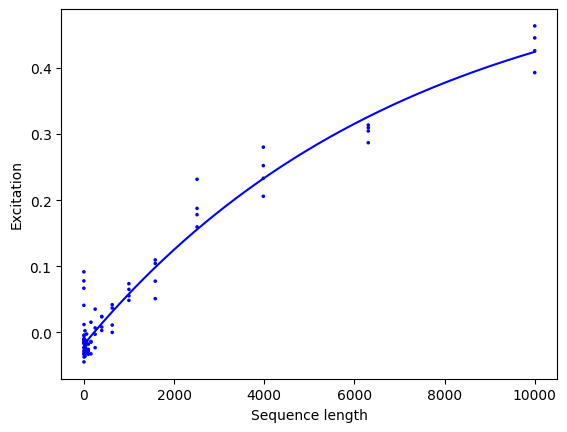

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def ffunc(x, initial, final, alpha):
    """Randomized benchmarking exponential"""
    exp_scale = 1
    return final + (initial - final) * alpha**(exp_scale*x)

fig, axes = plt.subplots(
    nrows=1,
    ncols=1,
    #sharex="col", sharey="row",
    #figsize=(5, 10)
)


axes.scatter(
    data_dict["rbdat_clifford_numbers"],
    data_dict["rbdat_calibrated_signal"],
    s = np.ones(len(data_dict["rbdat_calibrated_signal"]))*2.5,
    c = 'b'
)

axes.plot(
    np.linspace(0,10000,10000),
    ffunc(
        np.linspace(0,10000,10000),
        data_dict["popt"][0], data_dict["popt"][1], data_dict["popt"][2]
    ),
    c = 'b',
    label="Exponential fit"
)
axes.set_ylabel("Excitation")
axes.set_xlabel("Sequence length")
#axes.legend()
plt.savefig('rb_precal.svg')
